# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [10]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, morphology, color
import cv2
from skimage.exposure import histogram
from skimage.filters import rank
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

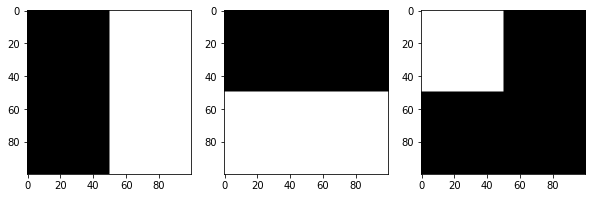

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


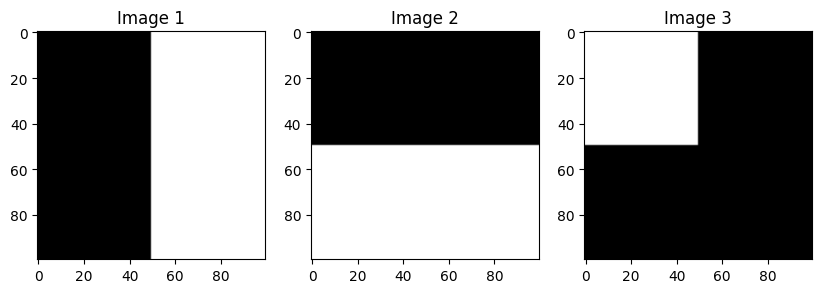

In [11]:
# solution
# First image:
image1 = np.zeros((100, 100), dtype=np.uint8)
image1[:, 50:] = 255  # Right half white

# Second image:
image2 = np.zeros((100, 100), dtype=np.uint8)
image2[50:, :] = 255  # Bottom half white

# Third image: 
image3 = np.zeros((100, 100), dtype=np.uint8)
image3[:50, :50] = 255  # Small white square

# Display Images
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(image1, cmap='gray'); axs[0].set_title("Image 1")
axs[1].imshow(image2, cmap='gray'); axs[1].set_title("Image 2")
axs[2].imshow(image3, cmap='gray'); axs[2].set_title("Image 3")

plt.show()



*   Use the above three images to create the following image

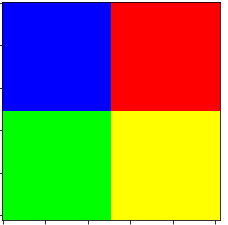
*Hint: Remember channels and color spaces*

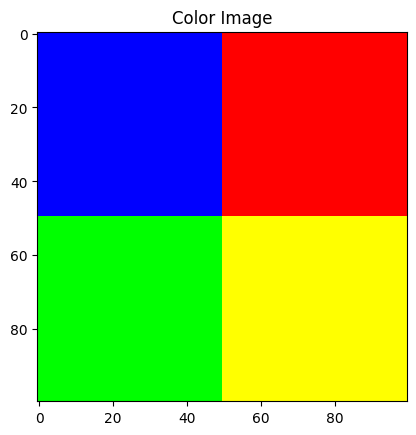

In [12]:
# solution
# Stack grayscale images into RGB channels
color_image = np.zeros((100, 100, 3), dtype=np.uint8)

# Assign grayscale images to respective color channels
color_image[:, :, 0] = image1  # Red channel
color_image[:, :, 1] = image2  # Green channel
color_image[:, :, 2] = image3  # Blue channel

# Display the final image
plt.imshow(color_image)
plt.title("Color Image")
plt.show()


### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

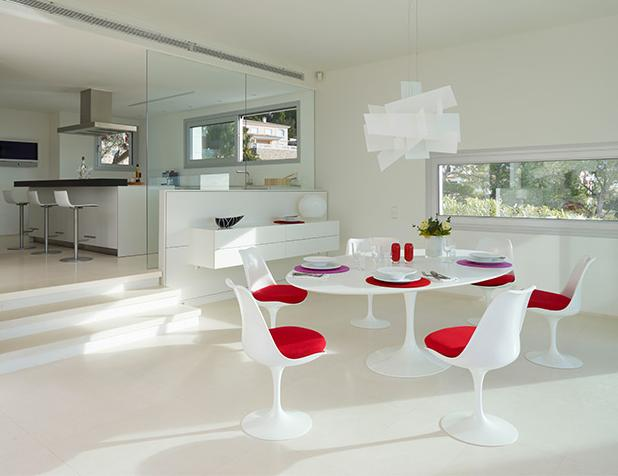

*   Extract individual channels and plot them using matplotlib subplot.



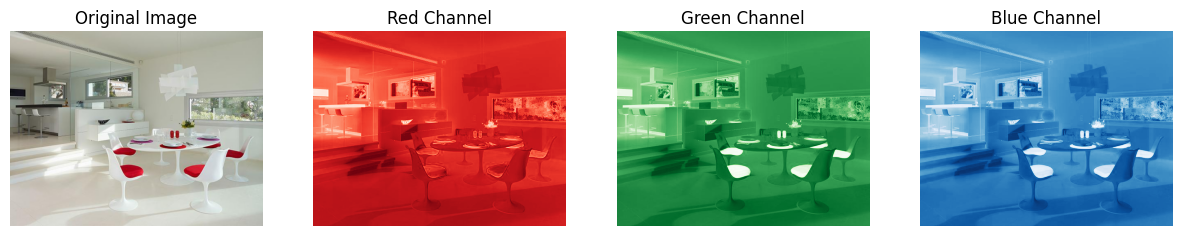

In [27]:
# solution
image = cv2.imread("images/sillas.jpg")  
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Extract individual channels
red_channel = image[:, :, 0]    
green_channel = image[:, :, 1]  
blue_channel = image[:, :, 2]   

# Display the channels
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Original image
axs[0].imshow(image)
axs[0].set_title("Original Image")
axs[0].axis("off")

# Red channel
axs[1].imshow(red_channel, cmap="Reds")
axs[1].set_title("Red Channel")
axs[1].axis("off")

# Green channel
axs[2].imshow(green_channel, cmap="Greens")
axs[2].set_title("Green Channel")
axs[2].axis("off")

# Blue channel
axs[3].imshow(blue_channel, cmap="Blues")
axs[3].set_title("Blue Channel")
axs[3].axis("off")

plt.show()



*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

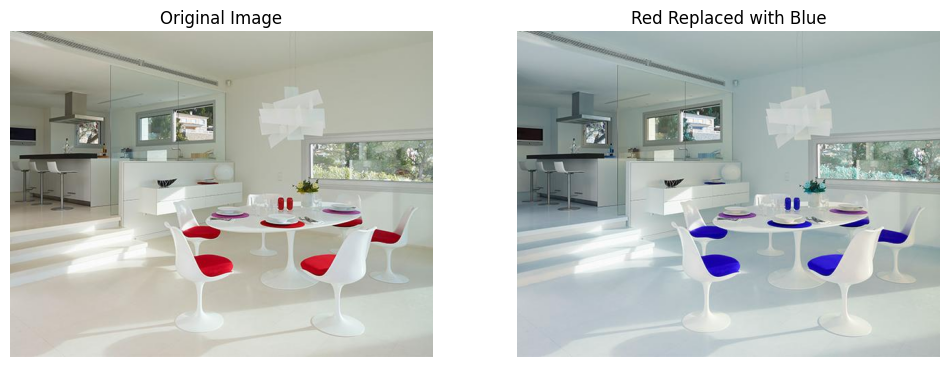

In [14]:
# solution
# new image where red is changed to blue
new_image = image.copy()
new_image[:, :, 0] = image[:, :, 2]  # Set Blue channel to Red values
new_image[:, :, 2] = image[:, :, 0]  # Set Red channel to Blue values

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axs[0].imshow(image)
axs[0].set_title("Original Image")
axs[0].axis("off")

# Modified image 
axs[1].imshow(new_image)
axs[1].set_title("Red Replaced with Blue")
axs[1].axis("off")

plt.show()


# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

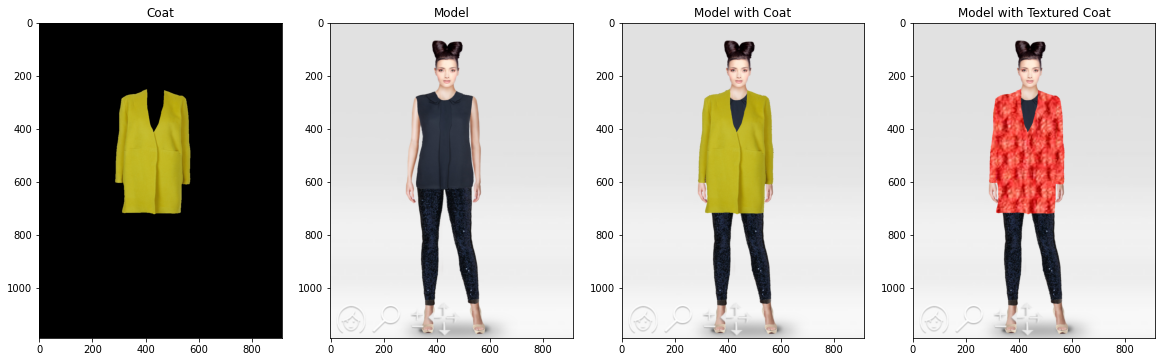

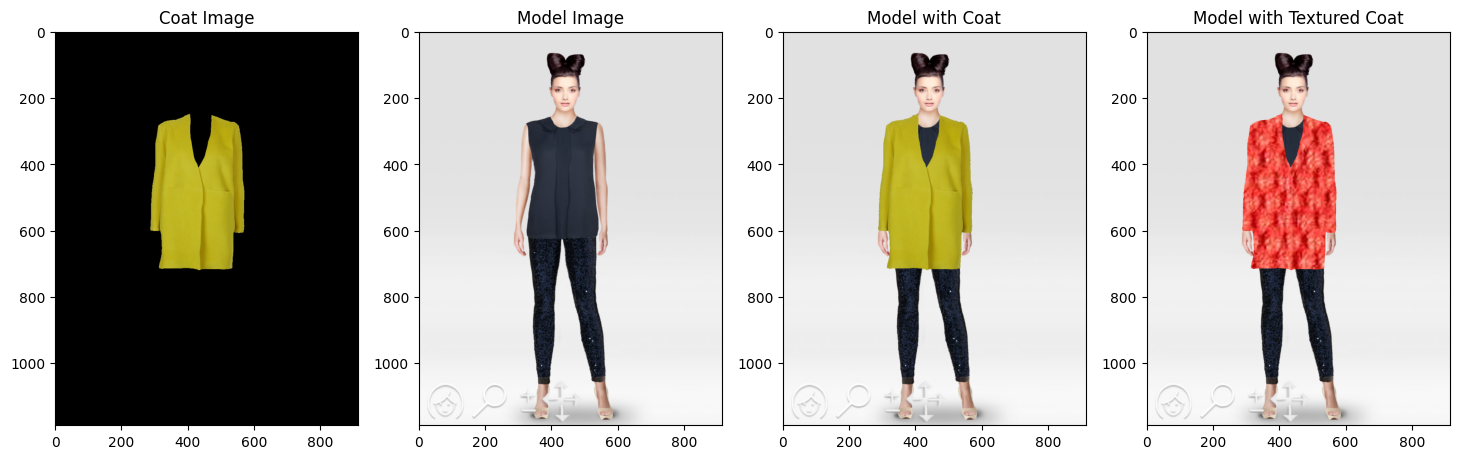

In [15]:

# Load images
model = cv2.imread("images/model.png", cv2.IMREAD_UNCHANGED)  # Model image
coat = cv2.imread("images/coat.png", cv2.IMREAD_UNCHANGED)    # Coat image
texture = cv2.imread("images/texture2.png")  # Texture image

# Convert all images to RGB 
model = cv2.cvtColor(model, cv2.COLOR_BGR2RGB)
coat = cv2.cvtColor(coat, cv2.COLOR_BGR2RGB)
texture = cv2.cvtColor(texture, cv2.COLOR_BGR2RGB)

# Create a mask for the coat
coat_gray = cv2.cvtColor(coat, cv2.COLOR_RGB2GRAY)
_, mask = cv2.threshold(coat_gray, 1, 255, cv2.THRESH_BINARY)

# Resize the coat and textured to match the size of the model
coat_resized = cv2.resize(coat, (model.shape[1], model.shape[0]))
texture_resized = cv2.resize(texture, (coat_resized.shape[1], coat_resized.shape[0]))

# Create an inverse mask for the model area 
inverse_mask = cv2.bitwise_not(mask)
# Place the model 
model_area = cv2.bitwise_and(model, model, mask=inverse_mask)
# Place the coat 
coat_area = cv2.bitwise_and(coat_resized, coat_resized, mask=mask)
# Combine Model coat 
model_with_coat = cv2.add(model_area, coat_area)


# apply the texture to blend the coat with the texture
coat_texture = cv2.bitwise_and(texture_resized, texture_resized, mask=mask)
# Place the textured coat on the canvas 
coat_area = cv2.bitwise_and(coat_texture, coat_texture, mask=mask)
# Resize coat_area to ensure both areas are the same size 
coat_area_resized = cv2.resize(coat_area, (model_area.shape[1], model_area.shape[0]))
# Combine the model and the textured coat
model_tex_coat = cv2.add(model_area, coat_area_resized)

# Display the images
fig, axs = plt.subplots(1, 4, figsize=(18, 6))

# Coat Image
axs[0].imshow(coat)
axs[0].set_title("Coat Image")

# Model Image
axs[1].imshow(model)
axs[1].set_title("Model Image")

# Model with coat
axs[2].imshow(model_with_coat)
axs[2].set_title("Model with Coat")

# Model with texture coat
axs[3].imshow(model_tex_coat)
axs[3].set_title("Model with Textured Coat")
plt.show()


# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




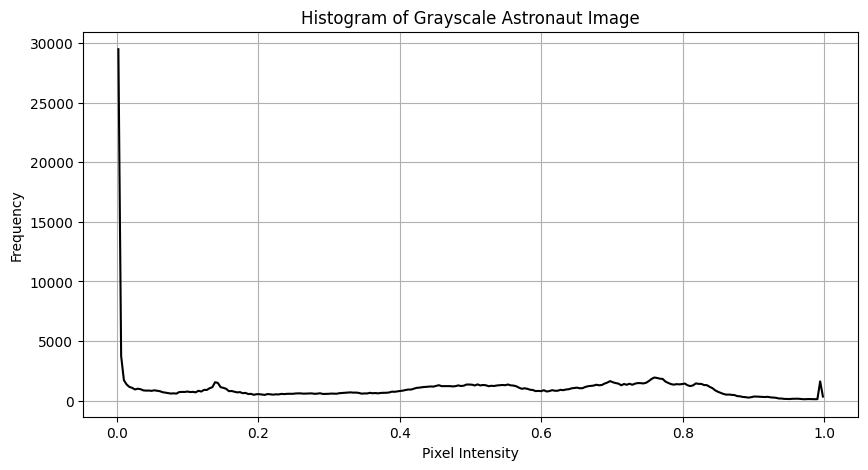

In [28]:
# solution

# Read the 'astronaut' image from the skimage data module
astronaut_image = data.astronaut()

# Convert the image to grayscale
grayscale = color.rgb2gray(astronaut_image)

# Compute the histogram 
hist, bin_centers = histogram(grayscale)

plt.figure(figsize=(10, 5))

plt.plot(bin_centers, hist, color='black')
plt.title("Histogram of Grayscale Astronaut Image")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

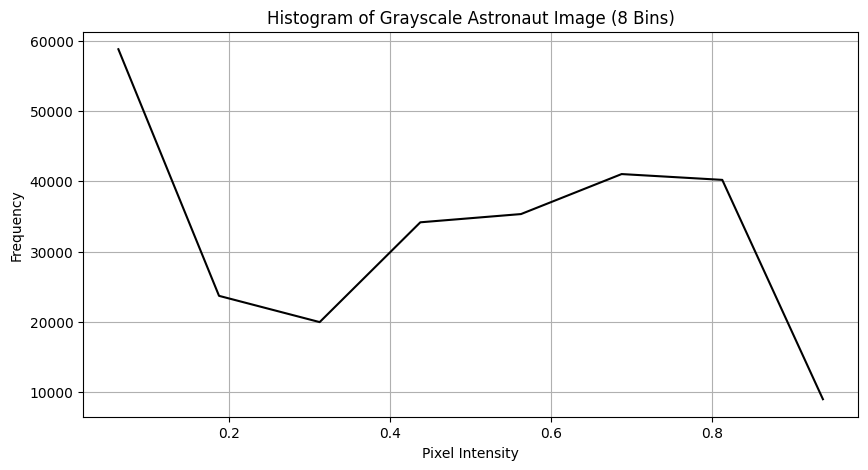

In [30]:
# solution
# change the bin to 8 
hist, bin_centers = histogram(grayscale, nbins=8)

plt.figure(figsize=(10, 5))

#plt.bar(bin_centers, hist, width=bin_centers[1] - bin_centers[0], color='black', align='center')
plt.plot(bin_centers, hist, color='black')
plt.title("Histogram of Grayscale Astronaut Image (8 Bins)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()





*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*
    **(What happens when you change the bin count?**

    Low bin count: Gives a rough, general view of the image's brightness.

    High bin count: Shows more detail but can be harder to interpret.

    **Does your inference change based on the bin count?**

    Yes, my inference changes; the correct bin count is defined based on the image's complexity and the level of detail required for the analysis.

    **If yes, then how do you define the correct bin count?**

    Depending on the image's complexity and the analysis you want to perform.

    **What happens when the bin count is very low?**

    Loses details and only shows broad patterns (e.g., dark vs. light areas).

    **What happens when the bin count is very high?**

    Captures too much details, which can make the histogram harder to read and less useful.

)*

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


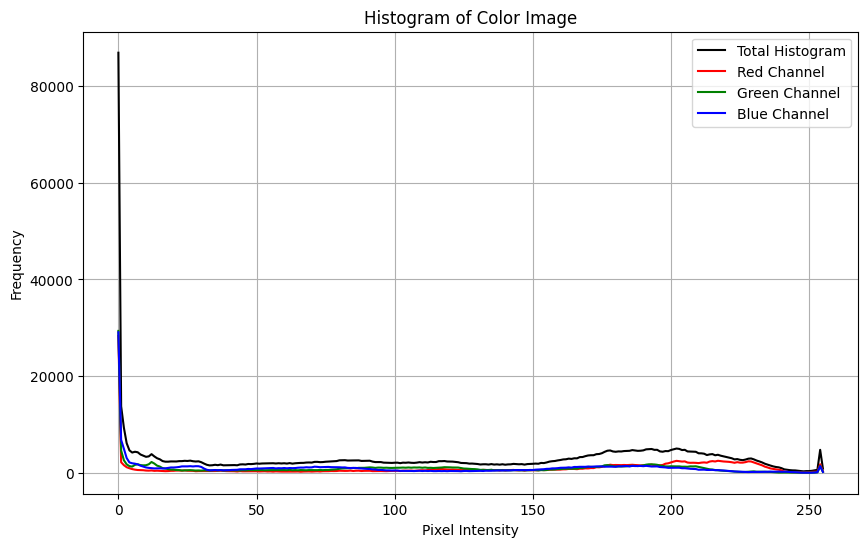

In [18]:
#solution
# Compute histograms for each channel (Red, Green, Blue)
red_channel = astronaut_image[:, :, 0]
green_channel = astronaut_image[:, :, 1]
blue_channel = astronaut_image[:, :, 2]

# Compute the histograms for each channel (with 256 bins)
red_hist = np.histogram(red_channel, bins=256, range=(0, 256))[0]
green_hist = np.histogram(green_channel, bins=256, range=(0, 256))[0]
blue_hist = np.histogram(blue_channel, bins=256, range=(0, 256))[0]

# Compute the total histogram 
total_hist = red_hist + green_hist + blue_hist

plt.figure(figsize=(10, 6))
plt.plot(total_hist, color='black', label='Total Histogram') # total histogram

# Red, Green, and Blue histograms
plt.plot(red_hist, color='red', label='Red Channel')
plt.plot(green_hist, color='green', label='Green Channel')
plt.plot(blue_hist, color='blue', label='Blue Channel')

plt.title('Histogram of Color Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()



### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



c:\Python38\lib\site-packages\skimage\_shared\utils.py:316: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


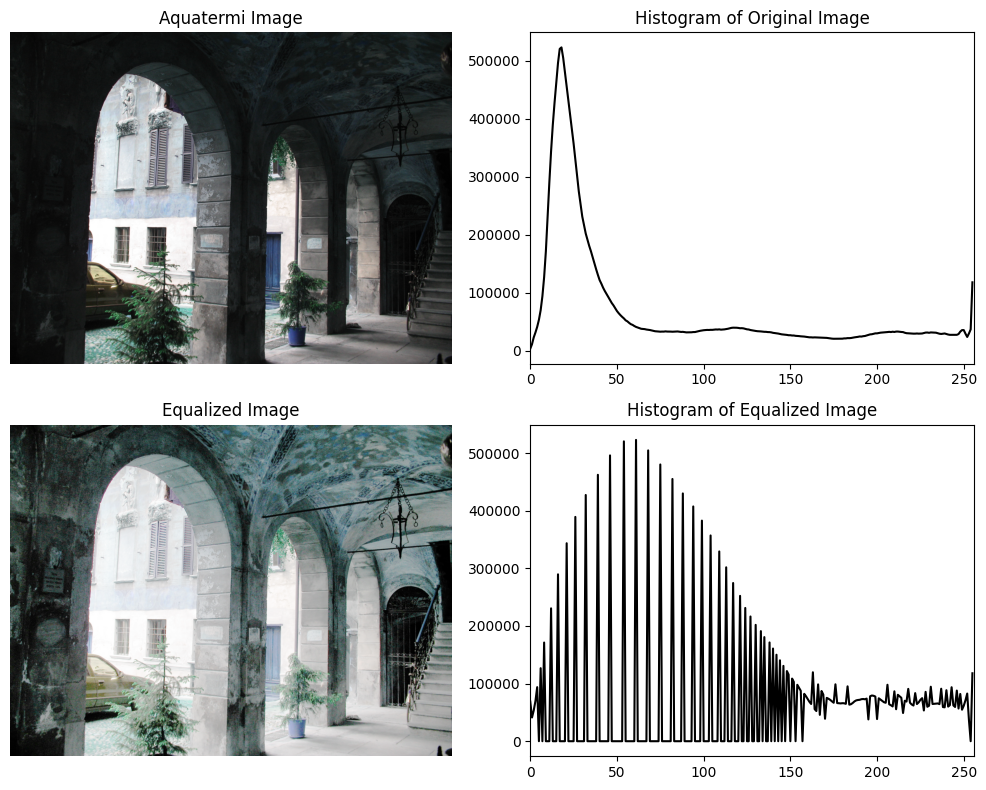

In [19]:
# solution
aqua_image = cv2.imread('images/aquatermi_lowcontrast.jpg')

#Compute the histogram 
hist = np.histogram(aqua_image, bins=256, range=(0, 256))[0]

# Perform histogram equalization
equalized_image = exposure.equalize_hist(aqua_image)

# Compute the histogram of the equalized image
equalized_hist = np.histogram((equalized_image * 255).astype(np.uint8), bins=256, range=(0, 256))[0]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].imshow(aqua_image, cmap='gray')
axs[0, 0].set_title("Aquatermi Image")
axs[0, 0].axis('off')

axs[0, 1].plot(hist, color='black')
axs[0, 1].set_title("Histogram of Original Image")
axs[0, 1].set_xlim(0, 256)

# Equalized image and its histogram
axs[1, 0].imshow(equalized_image, cmap='gray')
axs[1, 0].set_title("Equalized Image")
axs[1, 0].axis('off')

axs[1, 1].plot(equalized_hist, color='black')
axs[1, 1].set_title("Histogram of Equalized Image")
axs[1, 1].set_xlim(0, 256)

plt.tight_layout()
plt.show()



*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*(Histogram equalization utilizes the cumulative distribution function (CDF) and interpolation to reassign pixel intensities, achieving a more even distribution. In contrast, linear contrast stretching applies a linear transformation to expand the intensity range without accounting for the pixel value distribution.
)*

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



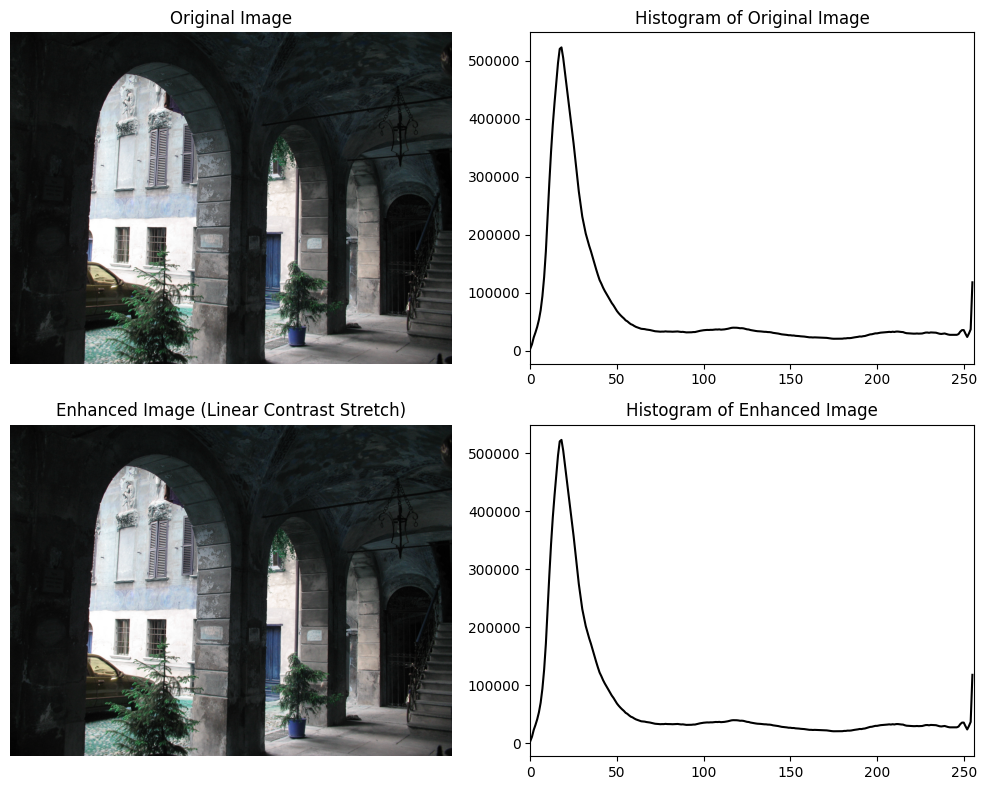

In [20]:
# solution

# Function to perform linear contrast stretch
def linear_contrast_stretch(image, bins=256):
    p_min = np.min(image) # min pixel value 
    p_max = np.max(image) # max pixel value 
    
    # Apply the linear contrast stretch formula
    stretched_image = ((image - p_min) / (p_max - p_min)) * 255
    stretched_image = np.uint8(stretched_image)  # Convert to uint8
    
    return stretched_image

enhanced_image = linear_contrast_stretch(aqua_image)

# Compute the histograms
original_hist = np.histogram(aqua_image, bins=256, range=(0, 256))[0]
enhanced_hist = np.histogram(enhanced_image, bins=256, range=(0, 256))[0]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Original image and its histogram
axs[0, 0].imshow(aqua_image, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 0].axis('off')

axs[0, 1].plot(original_hist, color='black')
axs[0, 1].set_title("Histogram of Original Image")
axs[0, 1].set_xlim(0, 256)

# Enhanced image and its histogram
axs[1, 0].imshow(enhanced_image, cmap='gray')
axs[1, 0].set_title("Enhanced Image (Linear Contrast Stretch)")
axs[1, 0].axis('off')

axs[1, 1].plot(enhanced_hist, color='black')
axs[1, 1].set_title("Histogram of Enhanced Image")
axs[1, 1].set_xlim(0, 256)

plt.tight_layout()
plt.show()



# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




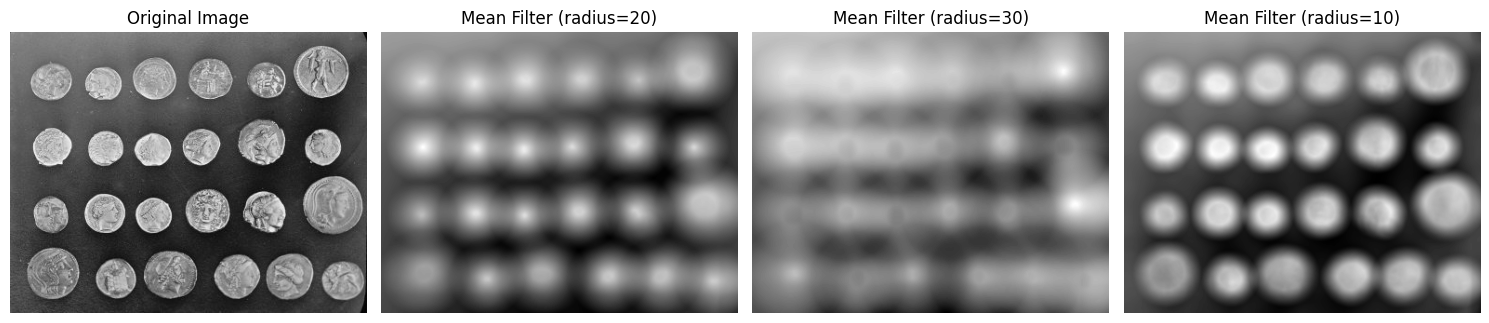

In [21]:
# solution
coin_image = data.coins()

# Define structuring elements with different radii
radii = [20, 30, 10]
filtered_images = []

for r in radii:
    selem = morphology.disk(r)  # Create a disk structuring element
    filtered = rank.mean(coin_image, selem)  # Apply mean filter
    filtered_images.append(filtered)

# Plot the original and filtered images
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(coin_image, cmap='gray')
axes[0].set_title("Original Image")

for i, r in enumerate(radii):
    axes[i+1].imshow(filtered_images[i], cmap='gray')
    axes[i+1].set_title(f"Mean Filter (radius={r})")

for ax in axes:
    ax.axis("off") 

plt.tight_layout() # prevent overlapping
plt.show()


*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

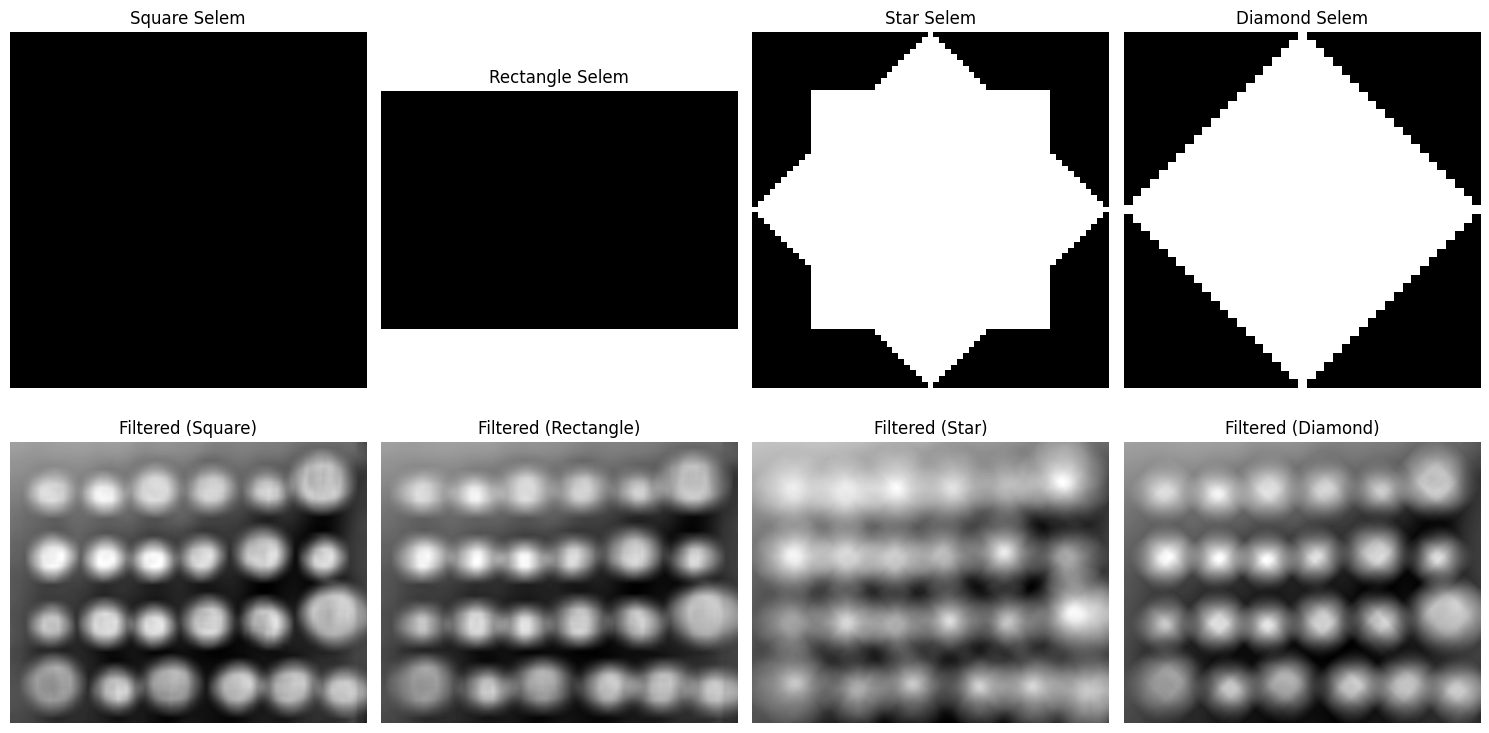

In [22]:
# solution
# Define different structuring elements
selems = {
    "Square": morphology.square(20),
    "Rectangle": morphology.rectangle(20, 30),
    "Star": morphology.star(20),
    "Diamond": morphology.diamond(20)
}

filtered_images = {}

# Apply mean filter with different structuring elements
for name, selem in selems.items():
    filtered_images[name] = rank.mean(coin_image, selem)

# Create a 2 x n subplot: first row for structuring elements, second row for filtered images
fig, axes = plt.subplots(2, len(selems), figsize=(15, 8))

for i, (name, selem) in enumerate(selems.items()): # Display the structuring element
    axes[0, i].imshow(selem, cmap='gray')
    axes[0, i].set_title(f"{name} Selem")
    axes[0, i].axis("off")
    
    # Display the filtered image
    axes[1, i].imshow(filtered_images[name], cmap='gray')
    axes[1, i].set_title(f"Filtered ({name})")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()



*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*   (Increasing the disk radius results in stronger smoothing by averaging over a larger area, reducing noise but also blurring details.
)*

...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

*   (Different structuring elements affect the smoothing pattern, with shapes like squares preserving edges better and diamonds or stars introducing unique smoothing artifacts.
)*

...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

*   (Difference: The mean filter applies uniform averaging, while the Gaussian filter gives more weight to central pixels, preserving edges better.

    Usage: Mean filters are used for simple noise reduction, while Gaussian filters are preferred for smoother blurring and edge preservation.)*

...